# Analysis of Arsenal 2003 - 2004 49 game unbeated run

Welcome to the programming example page - This page will show example code that is applicable to the analysis, for reference in your analysis.

In [18]:
import pandas as pd
import math
from ipywidgets import interact
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [19]:
dataFrame = pandas.read_csv('nobel.csv',',') #Getting the data into a panda DataFrame
test_df = pd.DataFrame([u'Hello \u00E9 World'])
test_df
#The data you will work with will not be in .csv form, but can use DataFrame(Array) to do the same thing

,0
0,Hello é World


Lets view the first few lines of the table. As we have put the data into a pandas DataFrame we can now use all the functions associated with DataFrames, so we can use .head(). You can find a list of functions you will find useful [here](LINK THIS).

You will see in other work the convention df for naming dataframes. Here we have used the full word for readabilities sake.

In [20]:
dataFrame.head(5) #Displaying some of the data so you can see what form it takes in the DataFrame


,Year,Category,Name,Birthdate,Birth Place,County,Residence,Role/Affiliate,Field/Language,Prize Name,Motivation
0,1901,chemistry,Jacobus Henricus van 't Hoff,30 August 1852,Rotterdam,the Netherlands,NaN,"Berlin University, Berlin, Germany","Physical chemistry, chemical kinetics",The Nobel Prize in Chemistry,The Nobel Prize in Chemistry 1901 was awarded ...
1,1901,literature,Sully Prudhomme,16 March 1839,Paris,France,France,NaN,French,The Nobel Prize in Literature,The Nobel Prize in Literature 1901 was awarded...
2,1901,medicine,Emil Adolf von Behring,15 March 1854,Hansdorf (now Jankowa ?aga?ska),Prussia (now Poland),NaN,"Marburg University, Marburg, Germany",NaN,The Nobel Prize in Physiology or Medicine,The Nobel Prize in Physiology or Medicine 1901...
3,1901,peace,Fréd�ric Passy,20 May 1822,Paris,France,France,Founder and President of first French peace s...,"Humanitarian work, peace movement",The Nobel Peace Prize,The Nobel Peace Prize 1901 was awarded jointly...
4,1901,peace,Jean Henry Dunant,8 May 1828,Geneva,Switzerland,Switzerland,Originator Geneva Convention (Convention de G...,"Humanitarian work, peace movement",The Nobel Peace Prize,The Nobel Peace Prize 1901 was awarded jointly...


Firstly lets learn how to plot histograms. This is best done for continuous data so lets plot the attendance. Before we can properly plot a histogram we need to know certain things such as the min and max of the data.

In [5]:
dataFrame.min()

Game                      1
Opponent        Aston Villa
Home_Or_Away              A
GF                        0
GA                        0
Attendance           18.102
dtype: object

In [6]:
dataFrame.max()

Game                                 49
Opponent        Wolverhampton Wanderers
Home_Or_Away                          H
GF                                    6
GA                                    3
Attendance                       67.639
dtype: object

We can now plot the histogram over a sensible range using the hist function from matplot lib.

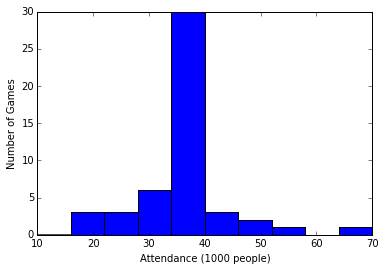

In [7]:
attendanceData = hist(dataFrame['Attendance'], bins=10, range=[10,70]) #Plot the histogram of attendence
xlabel('Attendance (1000 people)') #Plot an x label
ylabel('Number of Games') #Plot a y label


This is nice, but the group size is rather large! We can see that the most games occur between 35,000 and 45,000 people - but what if we wanted to see the effect of all of the home games being played in the same stadium, or more clearly see the spread of data? To do this we can change the number of bins (by changing the bin size) and replotting the graph. Try playing with the slider below to investigate how changing bin size effects the output graph.

<function __main__.plthist>

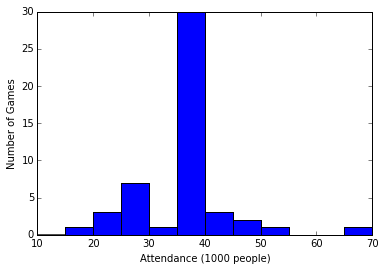

In [8]:
def plthist(bins): 
    changingBins = hist(dataFrame['Attendance'], bins=bins, range=[10,70])
    xlabel('Attendance (1000 people)') #Plot an x label
    ylabel('Number of Games') #Plot a y label
    BinSize = round(float(60)/bins,2)
    
    pass

interact(plthist,bins = [5,20,1])


As you can see by varying the slider - changing the bin size really does change how the data looks! There is discussion on what is the appropiate bin size to use in the main notebook.

It should be fairly obvious that there is a large spike in the data at 38,000 - 39,000 atendees, due to home games all being played at the same stadium. What if we wanted to know the true distribution of stadium sizes (assuming each stadium is close to being filled each game!) without the bias of the home games? This is where we can preselect our data in order to filter it!

## Pre Selections

We now want to pre select our data. This essentially means filtering based on a conditional statement. We could do so by building a new dataset from the old one with loops and if statements, but the inbuilt pandas function .query provides a quicker way.

In [9]:
awayPreSelection = "(Home_Or_Away == 'A')" #You can create a pre selection as a string and then pass it to DataFrame.query
homePreSelection = "(Home_Or_Away == 'H')" #The variables you test with conditions are the headers of the table  
homeDataFrame = dataFrame.query(homePreSelection) #Just another reason to use.head() to check what the data looks like!
awayDataFrame = dataFrame.query(awayPreSelection)

Lets check the new DataFrames to see if this has worked!

In [10]:
awayDataFrame.head()

,Game,Opponent,Home_Or_Away,GF,GA,Attendance
1,2,Sunderland,A,4,0,40.188
3,4,Middlesbrough,A,4,0,29.450
5,6,Manchester City,A,2,1,46.436
7,8,Manchester United,A,0,0,67.639
9,10,Liverpool,A,2,1,44.374


Brilliant! You will find this technique useful to do the momentum pre selections in the main analysis. Lets now plot the away games to see the distribution of stadium size throughout the different teams in the league.

You may currently be asking why the indexes skip all the even numbers? This is due to how query works and is explained below

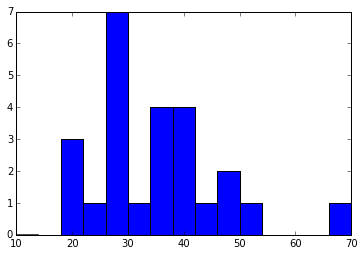

In [11]:
attendanceData = hist(awayDataFrame['Attendance'].values,bins = 15,range = [10,70]) #plot the non-biased distribution!
#.values is needed due to a quirk of how pandas.query works. More information below!

We have now successfully plotted the histogram of just the away games after applying our pre-selection. Why did we have to do...
>awayDataFrame['Attendance'].values

This (and the associated indexing weirdness) comes from the fact that when we apply .query to our original DataFrame creating the awayDataFrame there isn't a process of actually copying of actual. The new dataFrame just points to the values in the old one. This can lead to problems when using non-pandas functions that aren't ready to handle data whos first array index is not [0]. Using .values before the histogram avoids this problem!

# Goals For vs Goals Against Asymmetry - Scatter Plot

You will find this section useful for when it comes to creating a dalitz plot. Whilst this section does not create one the actual code for making a dalitz plot vs a scatter plot are the same, it's what you do with the data beforehand that makes the difference!

We want to see if Arsenal were spontaneously creating goals in a game without the equal and opposite reaction of the other team scoring against. In order to do this we can create a scatter plot of Goals For vs Goals against and look at the shape of the plot with respect to a line of equal goals for and against.

/root/miniconda/envs/rep_py2/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


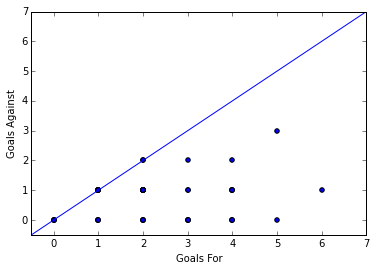

In [12]:
scatter(dataFrame['GF'].values,dataFrame['GA'].values)
plt.xlim(-0.5, 7) #force the plot to be square so we can look at symmetries
plt.ylim(-0.5, 7)
x = [x - 0.5 for x in range(8)]; x.append(7) #Generate numbers y = x for plotting line of symmetry
y = [y - 0.5 for y in range(8)]; y.append(7)
plt.plot(x,y); #Plot line y = x so we can see where exact symmetry would be, not necessary on your plots
xlabel('Goals For')
ylabel('Goals Against')

As you can see from the shape of scatter plot there is spontaneous breaking of Goals for/Goals against symmetry. Every single data point is on or below the line. Good job Arsenal! 

We can also plot a 2d histogram and bin the results, this data is not the best to do this with as there is not enough data in the set but will suffice for teaching purposes. Additionally it's quite strange to do this with discrete data (you end up with groups ending at non-integer values of goals) we have given you the ability to change the number of bins so you can see how the plot changes. Note that the number of total bins is the value of the slider squared. This is because the value of bins given in the hist2d function is the number of bins in one axis.

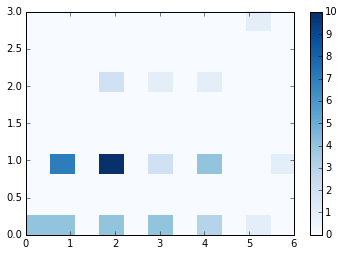

In [13]:
def plthist(bins):
    hist2d(dataFrame['GF'].values,dataFrame['GA'].values, bins=bins, cmap = 'Blues')#Plot the 2d histogram
    colorbar() #Set a colour legend
    show()
    
    
interact(plthist,bins = [1,20,1]) #Creates the slider

As you can see from playing about with the slider discrete data such as this doesn't work well at low high number of bins. Looking at the colour distribution at low bin numbers still shows the spontaneous goal creation! Even though this wasn't the best data to use, you can still use similar code in the main particle analysis!